<H1>DS4: Recognize voice: are you male or female??</H1>
We will see the question the author what are:
<ul>
<li>What other features differ between male and female voices?</li>
<li>Can we find a difference in resonance between male and female voices?</li>
<li>Can we identify falsetto from regular voices? (separate data-set likely needed for this)</li>
<li>Are there other interesting features in the data?</li>
</ul>
but i wanna know how classified methods do with dataset to classify. Then first i 'll ask my question and try to ask the question: what features are differ between male and female voices?.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot # plot in python
import seaborn as sns # data visualization in python 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

voice.csv



In [2]:
data = pd.read_csv("../input/voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<h1>Cleaning and analyze Data</h1>

In [3]:
#type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [4]:
#count the null value 
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
#share of data
print( "dimension of dataframe is: ",data.shape)
#how many men and women are in data?
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

dimension of dataframe is:  (3168, 21)
Number of male: 1584
Number of female: 1584


In [6]:
#Library what i will use
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

<h1>Data Standardization</h1>

In [7]:
#separate in features and label data
features = data.iloc[  : , :-1]
labels = data.iloc[ : , -1 ]
#preprocessing of data: i think that raw data can affect to performance of algorithms
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(labels)
scaler = StandardScaler()
scaler.fit(features)
x = scaler.transform(features)

<h1>Features selection : see the value of features </h1>

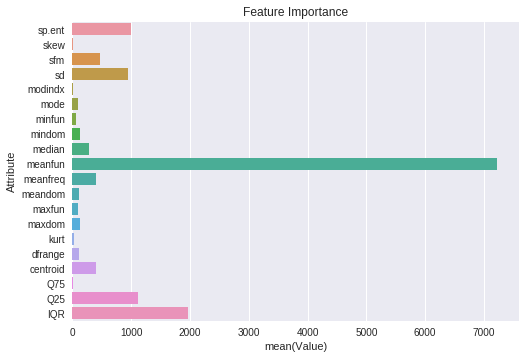

In [8]:
#create a selection
selection = SelectKBest( f_classif,  k = 5 )
model = selection.fit( x , y )
#preparate the scores
scores_features = pd.DataFrame()
scores_features["Value"] = selection.scores_
scores_features["Attribute"] = data.drop("label", axis = 1 ).columns
scores_features = scores_features.sort_values( ["Attribute"] , ascending = False )
#plots the value
plot1 = sns.barplot( x = scores_features['Value'] , y = scores_features['Attribute'] , data = scores_features   )
plot1.set_title('Feature Importance')

we say the meanfun , IQR , Q25 , sd and sp.ent features are most important than other

In [9]:
#create a dataset using features selection
features_selection = data[ ["IQR", "Q25" , "sd" , "sp.ent" , "meanfun" , "sfm" , "label" ] ]
features_fs = features_selection.iloc[  : , :-1]
labels_fs = features_selection.iloc[ : , -1 ]
#normalize the data
gender_encoder = LabelEncoder()
y_fs = gender_encoder.fit_transform( labels_fs )
scaler = StandardScaler()
scaler.fit( features_fs )
x_fs = scaler.transform( features_fs )
#create trainset and testset
x_fs_train , x_fs_test , y_fs_train  , y_fs_test = train_test_split( x_fs  , y_fs , test_size = 0.2 , random_state = 1 )
# the future plot
data_plot = pd.DataFrame( columns =("Method","Accuracy") )

<h1>Note</h1>
this is a benchmark point , if you wanna know the stability or accuracy of algorithm, you need to drawn evaluate each algorithm.

<h1>Classified Methods: SVM</h1>
<br>I selected linear SVM because i classify the unseen data in two class: male or female.

In [10]:
#create a SVM and see the precision
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)
svm_linear = SVC( kernel = 'linear' )
svm_linear.fit( x_train, y_train )
prediction = svm_linear.predict( x_test )
print("Accuracy Score ( default linear ): ",metrics.accuracy_score( y_test, prediction ) )
#with cross-validation 
score_cv = cross_val_score( svm_linear , x_test , y_test , scoring = "accuracy",cv = 10 )
print("-->Average accuracy score ( default linear ): ",score_cv.mean() )
data_plot.loc[ len(data_plot) ] = [ "SVM( default + linear) ", score_cv.mean( ) ]
# with tuned hiperparameter with gridsearch
tuned_parameter = { 'C': (np.arange(0.1 , 1 , 0.1 ) )  , 'kernel':[ 'linear' ] }
tuned_svm_linear = GridSearchCV( SVC() , tuned_parameter , cv = 10 , scoring = 'accuracy'  )
tuned_svm_linear.fit( x_train , y_train )
print("-->Accuracy score ( GridSearchCV defaultlinear ):",tuned_svm_linear.best_score_ )
print("Best parameter ( GridSearchCV default linear ):",tuned_svm_linear.best_params_)
data_plot.loc[ len(data_plot) ] = [ "SVM ( GridSearchCv + linear + default )" , tuned_svm_linear.best_score_ ]
#with C = 0.1
customer_svm_linear = SVC( kernel = 'linear', C= 0.1 )
customer_svm_linear.fit( x_train, y_train )
prediction = customer_svm_linear.predict( x_test )
print("Accuracy Score ( customer linear ) : ",metrics.accuracy_score( y_test, prediction ) )
#with cross-validation
score_cv = cross_val_score( customer_svm_linear , x_test , y_test , scoring = "accuracy",cv = 10 )
print("-->Average accuracy score ( customer linear ): ",score_cv.mean() )
data_plot.loc[ len( data_plot ) ] = [ "SVM ( Customer + linear )" , score_cv.mean() ]
#with rbf kernel default + cross validation
svm_rbf = SVC( kernel = "rbf")
svm_rbf.fit(x_train , y_train )
score_cv = cross_val_score( svm_rbf , x_test , y_test , scoring = "accuracy" , cv= 10 )
print("-->Average accuracy score( default RBF ): ",score_cv.mean() )
data_plot.loc[ len( data_plot ) ] = [ "SVM ( default + rbf )" , score_cv.mean() ]
#with rbf kernel + gridsearch
tuned_parameter = { 'C' : np.arange( 0.1 , 1 , 0.1) , 'gamma' : [ 0.01 , 0.02, 0.03 , 0.04 , 0.05] , 'kernel':['rbf'] }
tuned_svm_rbf = GridSearchCV( SVC() , tuned_parameter , cv = 10 , scoring = "accuracy" )
tuned_svm_rbf.fit( x_train , y_train )
print("-->Acurracy score ( GridSearchCV RBF ): ",tuned_svm_rbf.best_score_ )
print("Best parameter ( GridSearchCV rbf ): ",tuned_svm_rbf.best_params_)
data_plot.loc[ len( data_plot ) ] = [ "SVM ( GridSearchCV + rbf )" , tuned_svm_rbf.best_score_ ]

Accuracy Score ( default linear ):  0.977917981073
-->Average accuracy score ( default linear ):  0.971576617827
-->Accuracy score ( GridSearchCV defaultlinear ): 0.975138121547
Best parameter ( GridSearchCV default linear ): {'C': 0.20000000000000001, 'kernel': 'linear'}
Accuracy Score ( customer linear ) :  0.97476340694
-->Average accuracy score ( customer linear ):  0.96364010989
-->Average accuracy score( default RBF ):  0.971551816239
-->Acurracy score ( GridSearchCV RBF ):  0.981452249408
Best parameter ( GridSearchCV rbf ):  {'C': 0.90000000000000002, 'gamma': 0.05, 'kernel': 'rbf'}


We can say that the GridSearchCV get me a better accuracy than others. The RBF SVM ( with Grid Search and Cross Validation ) is better than other in accuracy and next is the linear SVM ( with Grid Search and Cross Validation ).

<h1>Classified Methods: CART</h1>

In [11]:
from sklearn.tree import DecisionTreeClassifier
#CART using default parameter and use CV
dt = DecisionTreeClassifier()
dt.fit( x_train , y_train )
score_dt = cross_val_score(dt , x_test , y_test , cv = 10 , scoring = "accuracy")
print("--> Average Accuracy score ( default ): ",score_dt.mean() )
data_plot.loc[ len( data_plot ) ] = [ "CART ( default ) ", score_dt.mean() ]
#using features selection
dt_fs = DecisionTreeClassifier()
dt_fs.fit( x_fs_train , y_fs_train )
score_dt = cross_val_score(dt_fs , x_fs_test , y_fs_test , cv = 10 , scoring = "accuracy")
print("--> Average Accuracy score ( feature selection default ): ",score_dt.mean() )
data_plot.loc[ len( data_plot ) ] = [ "CART ( features selection ) ", score_dt.mean() ]
#using GridSearchCV
tune_parameter = { 'criterion':["gini","entropy"] , 'max_depth': [ 3, 4 ,5 ,6 , 7 , 8, 9 ,10 ] }
tuned_dt = GridSearchCV( DecisionTreeClassifier() , tune_parameter , cv = 10 , scoring = "accuracy" )
tuned_dt.fit( x_train , y_train )
print("-->Acurracy score ( GridSearchCV default ): ",tuned_dt.best_score_ )
print("Best parameter ( GridSearchCV default ): ",tuned_dt.best_params_)
data_plot.loc[ len( data_plot ) ] = [ "CART ( GridSearchCV + default ) ", tuned_dt.best_score_ ]
#using GridSearchCV + feature selection
tune_parameter = { 'criterion':["gini","entropy"] , 'max_depth': [ 3, 4 ,5 ,6 , 7 , 8, 9 ,10 ] }
tuned_dt_fs = GridSearchCV( DecisionTreeClassifier() , tune_parameter , cv = 10 , scoring = "accuracy" )
tuned_dt_fs.fit( x_fs_train , y_fs_train )
print("-->Acurracy score ( GridSearchCV feature selection ): ",tuned_dt_fs.best_score_ )
print("Best parameter ( GridSearchCV feature selection ): ",tuned_dt_fs.best_params_) 
data_plot.loc[ len( data_plot ) ] = [ "CART ( GridSearchCV + feature selection ) ", tuned_dt_fs.best_score_ ]
#using entropy default
dt_entropy = DecisionTreeClassifier( criterion = 'entropy')
dt_entropy.fit( x_train , y_train )
score_dt_entropy = cross_val_score( dt_entropy ,x_test , y_test , cv = 10 , scoring = "accuracy" )
print("--> Average accuracy score ( entropy default ): ",score_dt_entropy.mean() )
data_plot.loc[ len( data_plot ) ] = [ "CART ( entropy + default ) ", score_dt_entropy.mean()]
#using entropy + features selection
dt_entropy = DecisionTreeClassifier( criterion = 'entropy')
dt_entropy.fit( x_fs_train , y_fs_train )
score_dt_entropy = cross_val_score( dt_entropy ,x_fs_test , y_fs_test , cv = 10 , scoring = "accuracy" )
print("--> Average accuracy score ( entropy feature selection ): ",score_dt_entropy.mean() )
data_plot.loc[ len( data_plot ) ] = [ "CART ( entropy + features selection ) ", score_dt_entropy.mean()]

--> Average Accuracy score ( default ):  0.954288385226
--> Average Accuracy score ( feature selection default ):  0.965276251526
-->Acurracy score ( GridSearchCV default ):  0.969613259669
Best parameter ( GridSearchCV default ):  {'criterion': 'entropy', 'max_depth': 5}
-->Acurracy score ( GridSearchCV feature selection ):  0.974743488556
Best parameter ( GridSearchCV feature selection ):  {'criterion': 'entropy', 'max_depth': 6}
--> Average accuracy score ( entropy default ):  0.960465506716
--> Average accuracy score ( entropy feature selection ):  0.957365308303


The tuned parameter + features selection version is better than other and next the tuned parameter version.

<h1>Methods: Logistic Regression </h1>

In [12]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression default
lr_default = LogisticRegression()
lr_default.fit( x_train , y_train )
prediction = lr_default.predict( x_test )
print("Accuracy ( default ): ",metrics.accuracy_score( y_test, prediction) )
scores = cross_val_score( lr_default , x_test , y_test , cv = 10 , scoring = "accuracy")
print("--> Average Accuracy ( default ): ",scores.mean() )
data_plot.loc[ len( data_plot ) ] = [ "Logistic Regression ( default ) ", scores.mean() ]
#Logistic Regression + GridSearchCV
tuned_parameter = { 'penalty': ['l1','l2'], 'solver':['liblinear'] , 'C': np.arange( 0.1 , 5 , 0.1 ) }
tuned_lr = GridSearchCV( LogisticRegression() , tuned_parameter, cv = 10 , scoring = "accuracy")
tuned_lr.fit( x_train , y_train )
print("--> Accurancy ( GridSearch default ): ",tuned_lr.best_score_ )
print("Best Parameter: ", tuned_lr.best_params_ )
data_plot.loc[ len( data_plot ) ] = [ "Logistic Regression ( GridSearchCV + default ) ", tuned_lr.best_score_ ]
#Logistic Regression + Features selection
lr_fs = LogisticRegression()
lr_fs.fit( x_fs_train , y_fs_train )
prediction = lr_fs.predict( x_fs_test )
print("Accuracy ( features selection ): ",metrics.accuracy_score( y_fs_test , prediction ) )
scores = cross_val_score( lr_fs , x_fs_test , y_fs_test , cv = 10 , scoring = "accuracy")
print("--> Average Accuracy ( features selection default ): ",scores.mean() )
data_plot.loc[ len( data_plot ) ] = [ "Logistic Regression ( features selection ) ", scores.mean()  ]
#Logistic Regression + Features selection + GridSearchCV
tuned_parameter = { 'penalty': ['l1','l2'], 'solver':['liblinear'] , 'C': np.arange( 0.1 , 5 , 0.1 ) }
tuned_lr_fs = GridSearchCV( LogisticRegression() , tuned_parameter, cv = 10 , scoring = "accuracy")
tuned_lr_fs.fit( x_fs_train , y_fs_train )
print("--> Accurancy ( GridSearch features selection ): ",tuned_lr_fs.best_score_ )
print("Best Parameter: ", tuned_lr_fs.best_params_ )
data_plot.loc[ len( data_plot ) ] = [ "Logistic Regression ( GridSearchCV + features selection ) ", tuned_lr_fs.best_score_  ]

Accuracy ( default ):  0.970031545741
--> Average Accuracy ( default ):  0.968377213065
--> Accurancy ( GridSearch default ):  0.972770323599
Best Parameter:  {'C': 0.80000000000000004, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy ( features selection ):  0.963722397476
--> Average Accuracy ( features selection default ):  0.968402014652
--> Accurancy ( GridSearch features selection ):  0.973559589582
Best Parameter:  {'C': 0.90000000000000002, 'penalty': 'l1', 'solver': 'liblinear'}


we say the gridsearchcv + features selection version is better than other and next is gridsearchcv + default version.

<h1>Method: Random Forest </h1>

In [13]:
#default
rf_default = RandomForestClassifier()
rf_default.fit( x_train , y_train )
prediction = rf_default.predict( x_test )
print("Accuracy ( default ): ",metrics.accuracy_score( prediction, y_test ) )
#with CV
score = cross_val_score( rf_default , x_test , y_test, cv= 20 , scoring = "accuracy" )
print("--> Average Accurancy ( default ): ",score.mean() )
data_plot.loc[ len( data_plot ) ] = [ "RandomForest ( default )" , score.mean() ]
#with GridSearchCV
tuned_parameter = {'criterion': ["gini","entropy"] , 'max_features': ["auto","log2"] , "max_depth": [ 3 , 4 ,5 , 6, 7 , 8 ,9 ,10,11,12 ] }
tuned_rf = GridSearchCV( RandomForestClassifier() , tuned_parameter , cv = 15 , scoring = "accuracy" )
tuned_rf.fit( x_train , y_train )
print("-->Accuracy ( GridSearch Default ): ",tuned_rf.best_score_ )
print("Best Parameter: ",tuned_rf.best_params_)
data_plot.loc[ len( data_plot ) ] = [ "RandomForest ( GridSearchCV + default )" , tuned_rf.best_score_   ]
#with features selection
rf_default = RandomForestClassifier()
rf_default.fit( x_fs_train , y_fs_train )
prediction = rf_default.predict( x_fs_test )
print("Accuracy ( features selection ): ",metrics.accuracy_score( prediction, y_fs_test ) )
score = cross_val_score( rf_default , x_fs_test , y_fs_test, cv= 20 , scoring = "accuracy" )
print("--> Average Accurancy ( features selection ): ",score.mean() )
data_plot.loc[ len( data_plot ) ] = [ "RandomForest ( features selection )" , score.mean() ]
#features selection + Gridsearch
tuned_parameter = {'criterion': ["gini","entropy"] , 'max_features': ["auto","log2"] , "max_depth": [ 3 , 4 ,5 , 6, 7 , 8 ,9 ,10,11,12 ] }
tuned_rf = GridSearchCV( RandomForestClassifier() , tuned_parameter , cv = 15 , scoring = "accuracy" )
tuned_rf.fit( x_fs_train , y_fs_train )
print("-->Accuracy ( GridSearch Default + features selection ): ",tuned_rf.best_score_ )
print("Best Parameter: ",tuned_rf.best_params_)
data_plot.loc[ len( data_plot ) ] = [ "RandomForest ( GridSearchCV + features selection )" , tuned_rf.best_score_   ]
# Customed
rf_tuned = RandomForestClassifier( criterion="gini", max_features = "log2", max_depth = 9 )
rf_tuned.fit( x_train , y_train )
score = cross_val_score( rf_tuned , x_test , y_test , cv = 20 , scoring = "accuracy" )
print("-->Average Accuracy ( customed default ): ",score.mean() )
rf_tuned.fit(x_fs_train , y_fs_train )
score = cross_val_score( rf_tuned, x_fs_test , y_fs_test , cv = 20 , scoring = "accuracy" )
print("-->Average accuracy (customed + features selection ): ", score.mean() )
data_plot.loc[ len( data_plot ) ] = [ "RandomForest ( Customer )" , score.mean()   ]

Accuracy ( default ):  0.97476340694
--> Average Accurancy ( default ):  0.966822458456
-->Accuracy ( GridSearch Default ):  0.980662983425
Best Parameter:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}
Accuracy ( features selection ):  0.97476340694
--> Average Accurancy ( features selection ):  0.965064455034
-->Accuracy ( GridSearch Default + features selection ):  0.980268350434
Best Parameter:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}
-->Average Accuracy ( customed default ):  0.965014051808
-->Average accuracy (customed + features selection ):  0.966626955034


the GridSearchVersion + default is better than other and next is GridSearchVersion + features selection.

<h1>Methods: Emsemble : AdaBoost </h1>

In [14]:
from sklearn.ensemble import  AdaBoostClassifier
#defaul
ab = AdaBoostClassifier()
ab.fit( x_train , y_train )
score = cross_val_score(ab , x_test , y_test , cv = 10 , scoring = "accuracy" )
print("--> Average accuracy ( default ): ",score.mean() )
data_plot.loc[ len( data_plot ) ] = [" adaboost ( default ) " , score.mean() ]
#GridSearchCV + default
tuned_parameter = {"n_estimators":[40 , 50 ,60 ,70 ,80 ] , 'algorithm':["SAMME","SAMME.R"]}
ab_tuned = GridSearchCV( AdaBoostClassifier() , tuned_parameter , cv = 10 , scoring = "accuracy" )
ab_tuned.fit( x_train , y_train )
print("--> Accuracy ( GridSearchCV + default ): ", ab_tuned.best_score_ )
print("best parameter: ",ab_tuned.best_params_)
data_plot.loc[ len( data_plot ) ] = [" adaboost ( GridSearchCV + default ) " , ab_tuned.best_score_ ]
# with feature selection
ab = AdaBoostClassifier()
ab.fit( x_fs_train , y_fs_train )
score = cross_val_score(ab , x_fs_test , y_fs_test , cv = 10 , scoring = "accuracy" )
print("--> Average accuracy ( feature selection ): ",score.mean() )
data_plot.loc[ len( data_plot ) ] = [" adaboost ( feature selection ) " , score.mean() ]
#GridSearchCV + feature selection
tuned_parameter = {"n_estimators":[40 , 50 ,60 ,70 ,80 ] , 'algorithm':["SAMME","SAMME.R"]}
ab_tuned = GridSearchCV( AdaBoostClassifier() , tuned_parameter , cv = 10 , scoring = "accuracy" )
ab_tuned.fit( x_fs_train , y_fs_train )
print("--> Accuracy ( GridSearchCV + selection ): ", ab_tuned.best_score_ )
print("best parameter: ",ab_tuned.best_params_)
data_plot.loc[ len( data_plot ) ] = [" adaboost ( GridSearchCV +  features selection ) " , ab_tuned.best_score_ ]

--> Average accuracy ( default ):  0.968500457875
--> Accuracy ( GridSearchCV + default ):  0.980268350434
best parameter:  {'algorithm': 'SAMME.R', 'n_estimators': 80}
--> Average accuracy ( feature selection ):  0.97162469475
--> Accuracy ( GridSearchCV + selection ):  0.972375690608
best parameter:  {'algorithm': 'SAMME', 'n_estimators': 80}


the GridSearch + default version is better than other and next is the GridSearch +features selection version.

<h1> Methods: General Plot</h1>

In [15]:
data_plot.sort_values( by = "Accuracy", ascending = False ).reset_index(drop = True )

,Method,Accuracy
0,SVM ( GridSearchCV + rbf ),0.981452
1,RandomForest ( GridSearchCV + default ),0.980663
2,adaboost ( GridSearchCV + default ),0.980268
3,RandomForest ( GridSearchCV + features selecti...,0.980268
4,SVM ( GridSearchCv + linear + default ),0.975138
5,CART ( GridSearchCV + feature selection ),0.974743
6,Logistic Regression ( GridSearchCV + features ...,0.973560
7,Logistic Regression ( GridSearchCV + default ),0.972770
8,adaboost ( GridSearchCV + features selection ),0.972376
9,adaboost ( feature selection ),0.971625


we can say following idea:
<ul>
<li> the less accuracy is 95.5% and most is 98.1 </li>
<li> We can't say nothing about the top 3 of the most accuracy because all change in each iteration</li>
<li> the 3 last accuracy are CART ( entropy + default , features selection ,  default)</li>
<li> the CART method is worst to accuracy in this dataset</li>
<li> the GridSearchCV give to improve to method </li>
<li> the SVM , RandomForest and AdaBoost are between top 10 of list </li>
</ul>

<h1>Question: what features are </h1>

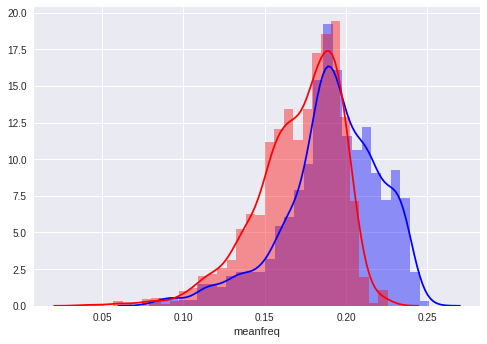

In [16]:
# will separate data
data_female = data.loc[  data[ "label" ] == "female", : ]
data_male = data.loc[ data[ "label" ] == "male", :]
#plot
plotf1 = sns.distplot( data_female["meanfreq"] , color = "blue") 
plotm1 = sns.distplot( data_male["meanfreq"] , color = "red")

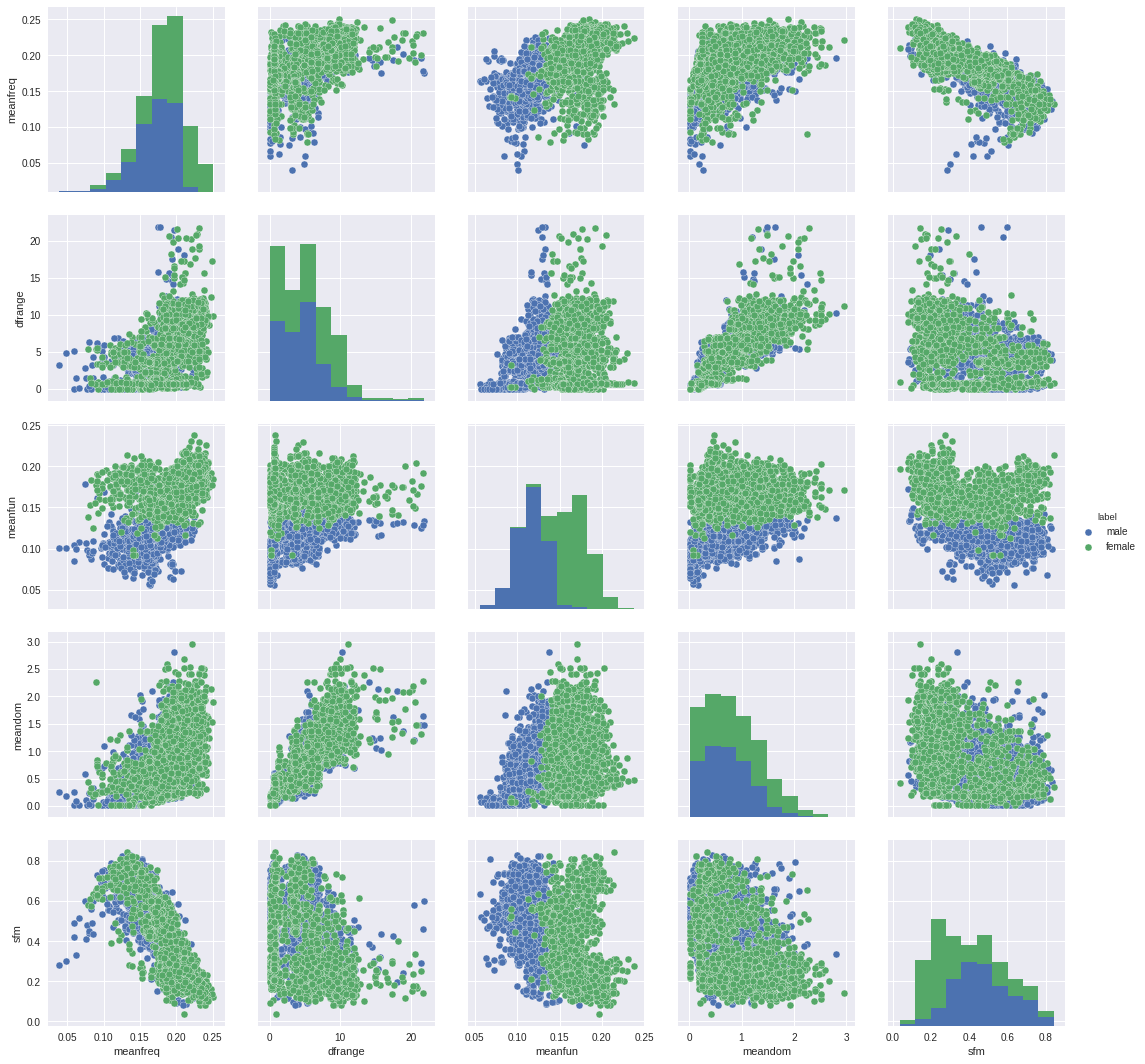

In [17]:
#see the relationship between some selected features
plot2 = sns.pairplot( data[ ["meanfreq","dfrange","meanfun","meandom","sfm","label"] ]  , hue = "label" , size = 3 )